In [94]:
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img



In [95]:
from keras.preprocessing.image import ImageDataGenerator
import datetime

original_start = datetime.datetime.now()
start = datetime.datetime.now()

In [96]:
train_dir = 'dataCNN/train'
validation_dir = 'dataCNN/val/'
test_dir = 'dataCNN/test/'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        batch_size=20,
        class_mode='categorical')


Found 6400 images belonging to 8 classes.
Found 797 images belonging to 8 classes.


In [98]:
model =  keras.models.Sequential()
model.add(layers.Conv2D(filters=64, kernel_size=3,activation='relu', padding="same",
                    kernel_initializer='he_normal', input_shape=[256, 256, 3]))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model.add(layers.BatchNormalization())
            # Add dropouts to the model
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=8, activation='softmax'))

In [99]:
model.compile(
        loss='categorical_crossentropy', 
        optimizer="nadam", 
        metrics=["accuracy"]
    )

In [ ]:
history = model.fit_generator(train_generator,
                epochs=16, 
                validation_data=validation_generator)

Epoch 1/16
  3/320 [..............................] - ETA: 35:02 - loss: 13.1081 - acc: 0.1333

In [51]:
history2 = model.fit_generator(train_generator, steps_per_epoch=100,
                epochs=50, 
                validation_data=validation_generator,validation_steps=100)

Epoch 1/50
100/100 [==============================] - 291s 3s/step - loss: 1.8333 - acc: 0.3130 - val_loss: 2.0879 - val_acc: 0.1550
Epoch 2/50
100/100 [==============================] - 292s 3s/step - loss: 1.8043 - acc: 0.3165 - val_loss: 1.8549 - val_acc: 0.2868
Epoch 3/50
100/100 [==============================] - 290s 3s/step - loss: 1.8331 - acc: 0.3025 - val_loss: 1.8169 - val_acc: 0.2929
Epoch 4/50
100/100 [==============================] - 291s 3s/step - loss: 1.8183 - acc: 0.3070 - val_loss: 1.8574 - val_acc: 0.2752
Epoch 5/50
100/100 [==============================] - 290s 3s/step - loss: 1.8258 - acc: 0.2965 - val_loss: 1.8248 - val_acc: 0.3109
Epoch 6/50
100/100 [==============================] - 291s 3s/step - loss: 1.8003 - acc: 0.3255 - val_loss: 1.9148 - val_acc: 0.2657
Epoch 7/50
100/100 [==============================] - 289s 3s/step - loss: 1.8215 - acc: 0.3120 - val_loss: 1.8095 - val_acc: 0.3054
Epoch 8/50
100/100 [==============================] - 292s 3s/step - 

In [ ]:
model2 =  keras.models.Sequential()

model2.add(layers.Conv2D(filters=64, kernel_size=3,activation='relu', padding="same",
                    kernel_initializer='he_normal', input_shape=[150, 150, 3]))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=(3, 3), activation='relu'))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.BatchNormalization())
            # Add dropouts to the model
model2.add(layers.Dropout(0.4))
model2.add(layers.Conv2D(64, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(layers.BatchNormalization())
model2.add(layers.Conv2D(128, kernel_size=(3, 3), strides=2,padding='same', activation='relu'))
model.add(layers.Dropout(0.4))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=512, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(units=8, activation='softmax'))

model2.compile(
        loss='categorical_crossentropy', 
        optimizer="RMSProp", 
        metrics=["accuracy"]
    )

In [ ]:
history4 = model2.fit_generator(train_generator, steps_per_epoch=100,
                epochs=20, 
                validation_data=validation_generator,validation_steps=100)

In [ ]:
def normalize_image_data(img_array, mean=128, std=128):
    '''Return a normalize scaling of images (on all pixels in each channel)
    '''
    return (img_array-mean)/std
    

In [13]:
from keras import layers 
from keras import models
from keras import optimizers

model2 = models.Sequential()
model2.add(layers.Dropout(0.4,input_shape=(256, 256, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dropout(0.4))
model2.add(layers.Dense(8, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# ⏰ This cell may take several minutes to run
history2 = model2.fit_generator(train_generator,steps_per_epoch=100, 
                              epochs=30,
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30


ValueError: Error when checking input: expected dropout_3_input to have shape (25, 256, 3) but got array with shape (256, 256, 3)

In [32]:
from keras import layers 
from keras import models
from keras import optimizers

model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu'))
model3.add(layers.Dropout(0.4))
model3.add(layers.Dense(8, activation='softmax'))
model3.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# ⏰ This cell may take several minutes to run
history3 = model3.fit_generator(train_generator,steps_per_epoch=100, 
                              epochs=30, 
                              validation_data=validation_generator, 
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 127s 1s/step - loss: 2.8520 - acc: 0.1510 - val_loss: 2.0551 - val_acc: 0.2026
Epoch 2/30
100/100 [==============================] - 126s 1s/step - loss: 2.0749 - acc: 0.1790 - val_loss: 2.0149 - val_acc: 0.1625
Epoch 3/30
100/100 [==============================] - 129s 1s/step - loss: 2.0157 - acc: 0.2100 - val_loss: 1.9463 - val_acc: 0.2548
Epoch 4/30
100/100 [==============================] - 129s 1s/step - loss: 1.9612 - acc: 0.2445 - val_loss: 1.9043 - val_acc: 0.2716
Epoch 5/30
100/100 [==============================] - 131s 1s/step - loss: 1.9228 - acc: 0.2650 - val_loss: 1.9526 - val_acc: 0.2347
Epoch 6/30
100/100 [==============================] - 131s 1s/step - loss: 1.8989 - acc: 0.2720 - val_loss: 1.8050 - val_acc: 0.3139
Epoch 7/30
100/100 [==============================] - 130s 1s/step - loss: 1.8459 - acc: 0.3090 - val_loss: 1.7654 - val_acc: 0.3280
Epoch 8/30
100/100 [==============================] - 129s 1s/step - 

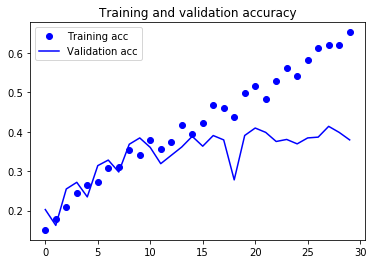

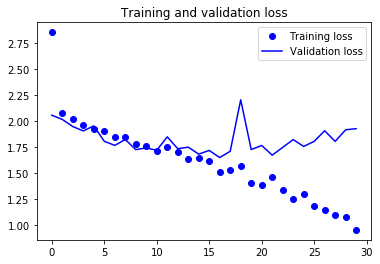

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(256, 256), 
                                                   
                                                  class_mode='categorical')
test_loss, test_acc = model3.evaluate_generator(test_generator)
print('test acc:', test_acc)



Found 800 images belonging to 8 classes.
test acc: 0.40125


In [29]:

model4 = models.Sequential()
model4.add(layers.Dropout(0.4,input_shape=(256, 256, 3)))
model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Flatten())
model4.add(layers.Dense(128,kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model4.add(layers.Dropout(0.3))
model4.add(layers.Dense(8, activation='softmax'))
model4.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])

# ⏰ This cell may take several minutes to run
history4 = model4.fit_generator(train_generator,  
                              epochs=30, 
                              validation_data=validation_generator)

Epoch 1/30
 12/320 [>.............................] - ETA: 6:57 - loss: 14.1985 - acc: 0.1333

KeyboardInterrupt: 

SyntaxError: invalid syntax (<ipython-input-25-9d01ccb457b2>, line 4)

In [24]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=(256, 256), 
                                                  batch_size=20, 
                                                  class_mode='categorical')
test_loss, test_acc = model4.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 800 images belonging to 8 classes.
test acc: 0.3300000035762787
